In [1]:
import numpy as np
import matplotlib.pyplot as plt

Declaração de Vetors de Posição e Plot

(0.0, 5.0, 0.0, 5.0)

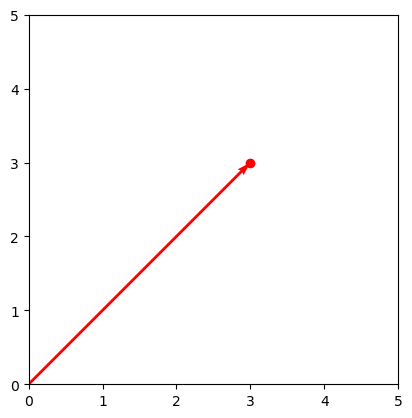

In [6]:
p = np.array([3, 3])

origin = np.array([0, 0])

plt.figure()
plt.plot(p[0], p[1], 'ro')
plt.quiver(*origin, *p, color='r', angles='xy', scale_units='xy', scale=1)

plt.axis('scaled')
plt.axis((0, 5, 0, 5))


Plot de Direção

[-2 -1]
2.23606797749979
-2.677945044588987
[-0.89442719 -0.4472136 ]


(0.0, 5.0, 0.0, 5.0)

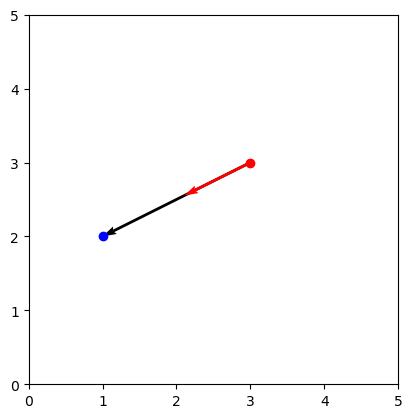

In [9]:
q = np.array([1, 2])
v = q - p
print(v)

# Norma (magnitude)
m = np.linalg.norm(v)
print(m)

# Orientação (ângulo)
a = np.arctan2(v[1], v[0])
print(a)

# Vetor unitário (direção)
u = v / m
print(u)

plt.figure()
plt.plot(p[0], p[1], 'ro')
plt.plot(q[0], q[1], 'bo')

# Plot do vetor deslocamento
plt.quiver(*p, *v, color='k', angles='xy', scale_units='xy', scale=1)

# Plot do vetor direção
plt.quiver(*p, *u, color='r', angles='xy', scale_units='xy', scale=1)

plt.axis('scaled')
plt.axis((0, 5, 0, 5))

Sistemas de Referencial Global e Local

[[ 1. -0.]
 [ 0.  1.]]


(0.0, 5.0, 0.0, 5.0)

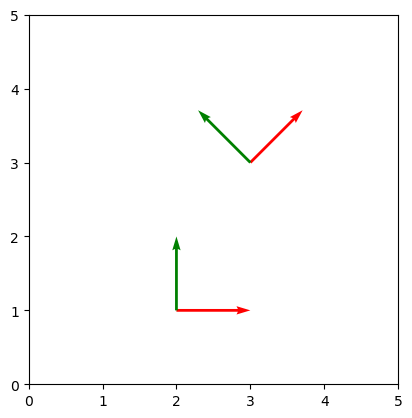

In [24]:
# Matriz de rotação
def R(theta):
  
    return np.array([[ np.cos(theta), -np.sin(theta)],
                      [ np.sin(theta), np.cos(theta)]])


# Plota um referencial no plano
def plot_frame(Porg, R, c=None):
    
    axis_size = 1.0    
    axes = axis_size*R
    
    x_axis = np.array(axes[0:2,0])
    y_axis = np.array(axes[0:2,1])
    
    if c == None:
        c = ['r', 'g']
    
    # X
    plt.quiver(*Porg[0:2], *x_axis, color=c[0], angles='xy', scale_units='xy', scale=1)
    
    # Y
    plt.quiver(*Porg[0:2], *y_axis, color=c[1], angles='xy', scale_units='xy', scale=1)
    
 
plt.figure()

# Frame Global
PorgG = np.array([2, 1])    
Rg = R(np.deg2rad(0))
plot_frame(PorgG, Rg)
print(Rg)

# Frame Local
PorgL = np.array([3, 3])    
RL = R(np.deg2rad(45))
plot_frame(PorgL, RL)

plt.axis('scaled')
plt.axis((0, 5, 0, 5))

Translação

In [25]:
pb = np.array([0, 3])

pa_borg = np.array([7, 2])

pa = pb + pa_borg
print(pa)

[7 5]


Rotação

In [28]:
pb = np.array([0, 2])
theta = np.deg2rad(30)

pa = R(theta) @ pb

print(R(theta))
print(pb)
print(pa)

[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]
[0 2]
[-1.          1.73205081]


Rotação e Translação

In [31]:
pb = np.array([3, 1])

pa_borg = np.array([-1, 5])

theta = np.deg2rad(30)
pa = R(theta) @ pb + pa_borg
print(pa)

[1.09807621 7.3660254 ]


Plot de Translação 

2.0


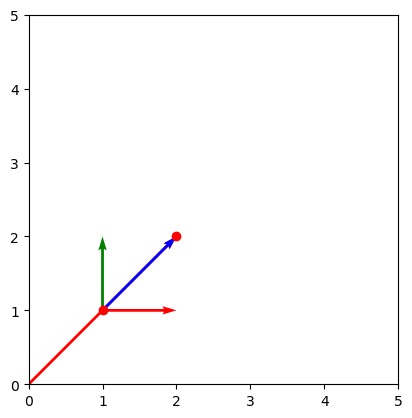

In [44]:
## Coordenada local do Objeto
Lp = np.array([1,1])
## Distância da Origem de {L} em relação a {G} e valor do deslocamento angular theta
PorgL = np.array([1, 1])  
RL = R(np.deg2rad(0))
plot_frame(PorgL, RL)
plt.axis('scaled')
plt.axis((0, 5, 0, 5))
## Plot do vetor posição do objeto em {G}
originG = np.array([0,0])
Gp = RL @ Lp + PorgL
print(Gp[0])
plt.plot(Gp[0], Gp[1], 'ro')
plt.quiver(*originG, *Gp, color='r', angles='xy', scale_units='xy', scale=1)

## Plot do vetor posição do objeto em {L}
originL = PorgL
plt.plot(Lp[0], Lp[1], 'ro')
plt.quiver(*originL, *Lp, color='b', angles='xy', scale_units='xy', scale=1)
